<a href="https://colab.research.google.com/github/arjunb00/MD/blob/main/Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
import cv2
import pandas as pd
import numpy as np
import sklearn
import os
from PIL import Image
import matplotlib.pyplot as plt


drive.mount('/content/gdrive')
os.chdir('gdrive/My Drive/PAD-UFES-20/output') 



# listing the folders containing images

# Train Dataset
train_folder="train/"
class_names=os.listdir(train_folder)
print(class_names)

# Validation Dataset
validation_folder="val/"
val_class_names=os.listdir(validation_folder)
print(val_class_names)

# Validation Dataset
test_folder="test/"
test_class_names=os.listdir(test_folder)
print(val_class_names)

# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import os

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers

# Library for Transfer Learning
from tensorflow.keras.applications import resnet50

print("Importing libraries completed.")


# Preparing Training image data (image array and class name) for processing

# Declaring variables
trainX=[] # to store array value of the images
trainY=[] # to store the labels of the images



for folder in os.listdir(train_folder):
    image_list=os.listdir(train_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(train_folder+"/"+folder+"/"+img_name,target_size=(128,128))
        
        # Converting to arrary
        img=image.img_to_array(img)
        
        # Transfer Learning: this is to apply preprocess of resnet to our images before passing it to resnet
        img=resnet50.preprocess_input(img) #  Optional step
        
        # Appending the arrarys
        trainX.append(img) # appending image array
        trainY.append(class_names.index(folder)) # appending class index to the array
        
print("Preparing Training Dataset Completed.")

# Preparing Training image data (image array and class name) for processing

# Declaring variables
valX=[] # to store array value of the images
valY=[] # to store the labels of the images

for folder in os.listdir(validation_folder):
    image_list=os.listdir(validation_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(validation_folder+"/"+folder+"/"+img_name,target_size=(128,128))
        
        # Converting to arrary
        img=image.img_to_array(img)
        
        # Transfer Learning: this is to apply preprocess of resnet to our images before passing it to resnet
        img=resnet50.preprocess_input(img) #  Optional step
        
        # Appending the arrarys
        valX.append(img) # appending image array
        valY.append(class_names.index(folder)) # appending class index to the array
        
print("Preparing Training Dataset Completed.")

# Preparing Training image data (image array and class name) for processing

# Declaring variables
testX=[] # to store array value of the images
testY=[] # to store the labels of the images

for folder in os.listdir(test_folder):
    image_list=os.listdir(test_folder+"/"+folder)
    for img_name in image_list:
        # Loading images
        print(img_name)
        img=image.load_img(test_folder+"/"+folder+"/"+img_name,target_size=(128,128))
        
        # Converting to arrary
        img=image.img_to_array(img)
        
        # Transfer Learning: this is to apply preprocess of resnet to our images before passing it to resnet
        img=resnet50.preprocess_input(img) #  Optional step
        
        # Appending the arrarys
        testX.append(img) # appending image array
        testY.append(class_names.index(folder)) # appending class index to the array
        
print("Preparing Training Dataset Completed.")

trainX = np.array(trainX)
trainY = np.array(trainY)
valX = np.array(valX)
valY = np.array(valY)
testX = np.array(testX)
testY = np.array(testY)


os.chdir('../')
metadata = pd.read_csv('metadata.csv')
metadata.drop(labels=['diagnostic', 'patient_id', 'background_father', 'background_mother', 'pesticide', 'has_piped_water', 'has_sewage_system', 'biopsed', 'fitspatrick', 'diameter_1', 'diameter_2', 'lesion_id'], axis=1, inplace = True)

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    dummies.add_suffix(feature_to_encode + '_')
    res = pd.concat([original_dataframe, dummies], axis=1)
    res.drop(feature_to_encode, axis = 1, inplace = True)
    return(res)


features_to_encode = ['itch', 'grew', 'hurt', 'changed', 'bleed', 'region', 'skin_cancer_history', 'cancer_history', 'gender', 'smoke', 'drink','elevation']

for feature in features_to_encode :
    metadata = encode_and_bind(metadata, feature)

os.chdir('./output')
trainXtab=[] # to store array value of the images
trainYtab=[] # to store the labels of the images

for folder in os.listdir(train_folder):
    image_list=os.listdir(train_folder+"/"+folder)
    for img_name in image_list:
        trainXtab.append(img_name) # appending image array

        
valXtab=[] # to store array value of the images
valYtab=[] # to store the labels of the images

for folder in os.listdir(validation_folder):
    image_list=os.listdir(validation_folder+"/"+folder)
    for img_name in image_list:
        valXtab.append(img_name) 



        
print("Preparing Training Dataset Completed.")

# Preparing Training image data (image array and class name) for processing

# Declaring variables
testXtab=[] # to store array value of the images
testYtab=[] # to store the labels of the images

for folder in os.listdir(test_folder):
    image_list=os.listdir(test_folder+"/"+folder)
    for img_name in image_list:

        testXtab.append(img_name) 

trainXmetadata = pd.DataFrame()
valXmetadata = pd.DataFrame()
testXmetadata = pd.DataFrame()

for i in trainXtab:
  trainXmetadata = trainXmetadata.append(metadata[metadata['img_id'] == i])

for i in testXtab:
  testXmetadata = testXmetadata.append(metadata[metadata['img_id'] == i])

for i in valXtab:
  valXmetadata = valXmetadata.append(metadata[metadata['img_id'] == i])     


trainXmetadata.drop(labels=['img_id'], axis=1, inplace = True)
testXmetadata.drop(labels=['img_id'], axis=1, inplace = True)
valXmetadata.drop(labels=['img_id'], axis=1, inplace = True)

Mounted at /content/gdrive
['NEV', 'BCC', 'ACK', 'SEK', 'SCC', 'MEL']
['NEV', 'BCC', 'ACK', 'SEK', 'SCC', 'MEL']
['NEV', 'BCC', 'ACK', 'SEK', 'SCC', 'MEL']
Importing libraries completed.
Preparing Training Dataset Completed.
Preparing Training Dataset Completed.
PAT_1249_862_658.png
PAT_1304_3507_308.png
PAT_1597_2666_130.png
PAT_1588_2629_296.png
PAT_1639_2879_744.png
PAT_1648_2904_523.png
PAT_1671_3008_622.png
PAT_1698_3122_83.png
PAT_1735_3242_27.png
PAT_1945_3923_428.png
PAT_1984_4038_265.png
PAT_2013_4148_303.png
PAT_213_328_117.png
PAT_2144_4738_120.png
PAT_2161_4818_501.png
PAT_244_374_726.png
PAT_341_715_180.png
PAT_344_718_206.png
PAT_417_828_723.png
PAT_439_859_283.png
PAT_471_909_344.png
PAT_471_909_394.png
PAT_621_1182_456.png
PAT_621_1183_56.png
PAT_672_1272_705.png
PAT_756_1496_480.png
PAT_793_1512_327.png
PAT_892_1691_881.png
PAT_900_1711_622.png
PAT_1535_1812_660.png
PAT_1514_1760_35.png
PAT_1591_2648_723.png
PAT_522_3168_747.png
PAT_61_299_74.png
PAT_1801_3459_857.png


In [ ]:
len(testX)

462

In [ ]:
neuron = [1024, 512, 256, 128, 64, 32, 16]
H =[]

for i in neuron:

  import os
  import cv2
  import imutils as imutils
  import numpy as np # linear algebra
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
  import tensorflow as tf # machine learning
  from tqdm import tqdm # make your loops show a smart progress meter 
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  from sklearn.metrics import accuracy_score, confusion_matrix
  import seaborn as sn
  from keras.layers import Dropout
  from keras.layers import Input, Dense, Concatenate
  from keras.models import Model
  # from keras.applications import VGG16
  import numpy as np

  # we are using resnet50 for transfer learnin here. So we have imported it
  from tensorflow.keras.applications import resnet50

  # Some random images, labels and target label
  trainImages = trainX
  trainLabels = trainXmetadata
  trainTarget = trainY

  valImages = valX
  valLabels = valXmetadata
  valTarget = valY

  # Extract VGG16 features for the images
  image_input = Input((128, 128, 3))

  model = resnet50.ResNet50(
      include_top=False,
      input_shape=(128, 128, 3),
      weights = 'imagenet',
      pooling='avg'
  )

  from tensorflow.keras.applications.resnet50 import ResNet50
  import tensorflow as tf

  #Flatten output layer of Resnet
  flattened = tf.keras.layers.Flatten()(model.output)

  #Fully connected layer 1
  fc1 = tf.keras.layers.Dense(2*i, activation='relu', name="AddedDense1")(flattened)

  #Fully connected layer, output layer
  fc2 = tf.keras.layers.Dense(i, activation='softmax', name="AddedDense2")(fc1)

  fE = tf.keras.models.Model(inputs=model.input, outputs=fc2)

  fE.summary()

  trainFeatures = fE.predict(trainX)
  valFeatures = fE.predict(valX)

  from keras.layers import Dropout

  # Two input layers: one for the image features, one for additional labels
  feature_input = Input((i,), name='feature_input')
  label_input = Input((43, ), name='label_input')

  concatenate_layer = Concatenate(name='concatenation')([feature_input, label_input]) 
  dense = Dense(64,activation='relu')(concatenate_layer)
  # dense = Dropout(0.3)(dense)
  dense = Dense(32,activation='relu')(concatenate_layer)
  # dense = Dropout(0.3)(dense)
  dense = Dense(16,activation='relu')(concatenate_layer)
  flatten=layers.Flatten()(dense) 
  output = Dense(6, name='output_layer', activation='softmax')(flatten)

  # To define the model, pass list of input layers
  model = Model(inputs=[feature_input, label_input], outputs=output)


  from sklearn.utils import class_weight

  valFeatures = np.reshape(valFeatures, (458, -1))
  trainFeatures = np.reshape(trainFeatures, (1378, -1))

  optimizer = tf.optimizers.Adam(learning_rate=0.003)

  model.compile(optimizer= optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  valconc = [valFeatures, valLabels]

  early_stopping = tf.keras.callbacks.EarlyStopping(
      monitor='val_accuracy',
      mode='max',
      patience=50
  )

  valData=(valconc ,valTarget)

  weight = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(trainTarget), y = trainTarget)
  weight = {i : weight[i] for i in range(6)}
  weight = {0: 1.5730593607305936,
  1: 0.452991452991453,
  2: 0.5243531202435312,
  3: 1.6288416075650118,
  4: 1.9971014492753623,
  5: 50}

  # To fit the model, pass a list of inputs arrays
  history = model.fit(x=[trainFeatures, trainLabels], y=trainTarget, epochs=2000,batch_size=1024,verbose=True, validation_data = valData)
  H.append(history)

Streaming output truncated to the last 5000 lines.
Epoch 1736/2000
2/2 [==============================] - 0s 21ms/step - loss: 0.4886 - accuracy: 0.8171 - val_loss: 0.7190 - val_accuracy: 0.7424
Epoch 1737/2000
2/2 [==============================] - 0s 26ms/step - loss: 0.4910 - accuracy: 0.8171 - val_loss: 0.7125 - val_accuracy: 0.7511
Epoch 1738/2000
2/2 [==============================] - 0s 26ms/step - loss: 0.4900 - accuracy: 0.8215 - val_loss: 0.7090 - val_accuracy: 0.7511
Epoch 1739/2000
2/2 [==============================] - 0s 27ms/step - loss: 0.4916 - accuracy: 0.8251 - val_loss: 0.7130 - val_accuracy: 0.7511
Epoch 1740/2000
2/2 [==============================] - 0s 26ms/step - loss: 0.4887 - accuracy: 0.8215 - val_loss: 0.7195 - val_accuracy: 0.7402
Epoch 1741/2000
2/2 [==============================] - 0s 22ms/step - loss: 0.4900 - accuracy: 0.8215 - val_loss: 0.7126 - val_accuracy: 0.7533
Epoch 1742/2000
2/2 [==============================] - 0s 26ms/step - loss: 0.4888 - 

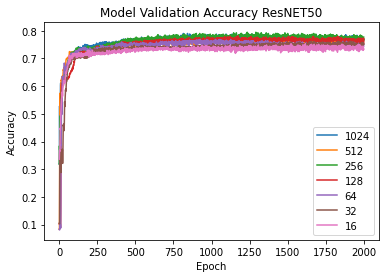

In [ ]:
for history in H:
 
  # plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Validation Accuracy ResNET50')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(neuron, loc='lower right')

plt.show()

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss ResNET50')
# plt.ylabel('Loss')
# plt.xlabel('epoch')
# plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
# plt.savefig(r'../Standard/LossDA' )
# plt.show()


# confusion_mtx = confusion_matrix(testY, pred)

# ax = plt.axes()
# sn.heatmap(confusion_mtx, annot=True,annot_kws={"size":10}, cmap="Blues", ax = ax)
# ax.set_title('Test Accuracy = ' + str(round(accuracy,3)), size=14)
# ax.xaxis.set_ticklabels(['NEV', 'BCC', 'ACK', 'SEK', 'SCC', 'MEL'])
# ax.yaxis.set_ticklabels(['NEV', 'BCC', 'ACK', 'SEK', 'SCC', 'MEL'])
# ax.set_xlabel('Predicted labels')
# ax.set_ylabel('True labels')
# plt.savefig(r'../Standard/CMDA' )
# plt.show()

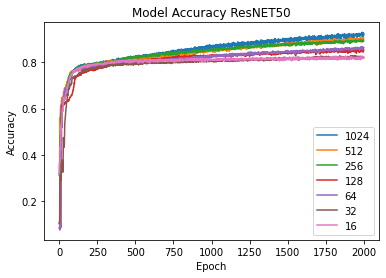

In [ ]:
for history in H:
 
  # plt.plot(history.history['accuracy'])
  plt.plot(history.history['accuracy'])
  plt.title('Model Accuracy ResNET50')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(neuron, loc='lower right')

plt.show()

In [ ]:
neuron = [2048,1024, 512, 256, 128, 64, 32]
H2 =[]

for i in neuron:

  import os
  import cv2
  import imutils as imutils
  import numpy as np # linear algebra
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
  import tensorflow as tf # machine learning
  from tqdm import tqdm # make your loops show a smart progress meter 
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  from sklearn.metrics import accuracy_score, confusion_matrix
  import seaborn as sn
  from keras.layers import Dropout
  from keras.layers import Input, Dense, Concatenate
  from keras.models import Model
  # from keras.applications import VGG16
  import numpy as np

  # we are using resnet50 for transfer learnin here. So we have imported it
  from tensorflow.keras.applications import resnet50

  # Some random images, labels and target label
  trainImages = trainX
  trainLabels = trainXmetadata
  trainTarget = trainY

  valImages = valX
  valLabels = valXmetadata
  valTarget = valY

  # Extract VGG16 features for the images
  image_input = Input((128, 128, 3))

  model = resnet50.ResNet50(
      include_top=False,
      input_shape=(128, 128, 3),
      weights = 'imagenet',
      pooling='avg'
  )

  from tensorflow.keras.applications.resnet50 import ResNet50
  import tensorflow as tf

  #Flatten output layer of Resnet
  flattened = tf.keras.layers.Flatten()(model.output)

  #Fully connected layer 1
  fc1 = tf.keras.layers.Dense(128, activation='relu', name="AddedDense1")(flattened)

  #Fully connected layer, output layer
  fc2 = tf.keras.layers.Dense(64, activation='softmax', name="AddedDense2")(fc1)

  fE = tf.keras.models.Model(inputs=model.input, outputs=fc2)

  fE.summary()

  trainFeatures = fE.predict(trainX)
  valFeatures = fE.predict(valX)

  from keras.layers import Dropout

  # Two input layers: one for the image features, one for additional labels
  feature_input = Input((64,), name='feature_input')
  label_input = Input((43, ), name='label_input')

  concatenate_layer = Concatenate(name='concatenation')([feature_input, label_input]) 
  dense = Dense(64,activation='relu')(concatenate_layer)
  # dense = Dropout(0.3)(dense)
  dense = Dense(32,activation='relu')(concatenate_layer)
  # dense = Dropout(0.3)(dense)
  dense = Dense(16,activation='relu')(concatenate_layer)
  flatten=layers.Flatten()(dense) 
  output = Dense(6, name='output_layer', activation='softmax')(flatten)

  # To define the model, pass list of input layers
  model = Model(inputs=[feature_input, label_input], outputs=output)


  from sklearn.utils import class_weight

  valFeatures = np.reshape(valFeatures, (458, -1))
  trainFeatures = np.reshape(trainFeatures, (1378, -1))

  optimizer = tf.optimizers.Adam(learning_rate=0.003)

  model.compile(optimizer= optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  valconc = [valFeatures, valLabels]

  early_stopping = tf.keras.callbacks.EarlyStopping(
      monitor='val_accuracy',
      mode='max',
      patience=50
  )

  valData=(valconc ,valTarget)

  weight = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(trainTarget), y = trainTarget)
  weight = {i : weight[i] for i in range(6)}
  weight = {0: 1.5730593607305936,
  1: 0.452991452991453,
  2: 0.5243531202435312,
  3: 1.6288416075650118,
  4: 1.9971014492753623,
  5: 50}

  # To fit the model, pass a list of inputs arrays
  history = model.fit(x=[trainFeatures, trainLabels], y=trainTarget, epochs=2000 ,batch_size=i,verbose=True, validation_data = valData)
  H2.append(history)

Streaming output truncated to the last 5000 lines.
Epoch 1736/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.4302 - accuracy: 0.8244 - val_loss: 0.9943 - val_accuracy: 0.7293
Epoch 1737/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.4282 - accuracy: 0.8302 - val_loss: 0.9791 - val_accuracy: 0.7293
Epoch 1738/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.4235 - accuracy: 0.8367 - val_loss: 1.0278 - val_accuracy: 0.7249
Epoch 1739/2000
22/22 [==============================] - 0s 5ms/step - loss: 0.4313 - accuracy: 0.8345 - val_loss: 1.0465 - val_accuracy: 0.7183
Epoch 1740/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.4318 - accuracy: 0.8338 - val_loss: 0.9790 - val_accuracy: 0.7358
Epoch 1741/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.4242 - accuracy: 0.8367 - val_loss: 1.0074 - val_accuracy: 0.7227
Epoch 1742/2000
22/22 [==============================] - 0s 4ms/step - loss: 0.

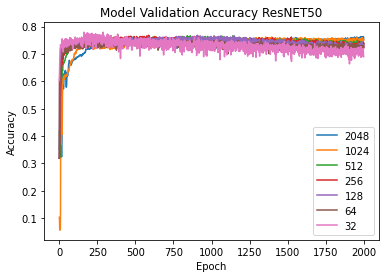

In [ ]:
for history in H2:
 
  # plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Validation Accuracy ResNET50')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(neuron, loc='lower right')

plt.show()


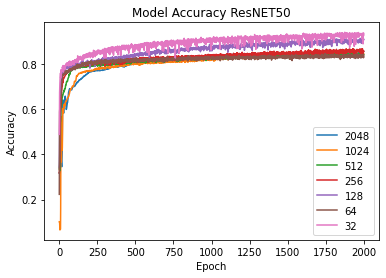

In [ ]:
for history in H2:
 
  # plt.plot(history.history['accuracy'])
  plt.plot(history.history['accuracy'])
  plt.title('Model Accuracy ResNET50')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(neuron, loc='lower right')

plt.show()

In [ ]:
batch = [0, 0.1, 0.2, 0.3, 0.4]
H3 =[]

for i in batch:

  import os
  import cv2
  import imutils as imutils
  import numpy as np # linear algebra
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
  import tensorflow as tf # machine learning
  from tqdm import tqdm # make your loops show a smart progress meter 
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  from sklearn.metrics import accuracy_score, confusion_matrix
  import seaborn as sn
  from keras.layers import Dropout
  from keras.layers import Input, Dense, Concatenate
  from keras.models import Model
  # from keras.applications import VGG16
  import numpy as np

  # we are using resnet50 for transfer learnin here. So we have imported it
  from tensorflow.keras.applications import resnet50

  # Some random images, labels and target label
  trainImages = trainX
  trainLabels = trainXmetadata
  trainTarget = trainY

  valImages = valX
  valLabels = valXmetadata
  valTarget = valY

  # Extract VGG16 features for the images
  image_input = Input((128, 128, 3))

  model = resnet50.ResNet50(
      include_top=False,
      input_shape=(128, 128, 3),
      weights = 'imagenet',
      pooling='avg'
  )

  from tensorflow.keras.applications.resnet50 import ResNet50
  import tensorflow as tf

  #Flatten output layer of Resnet
  flattened = tf.keras.layers.Flatten()(model.output)

  #Fully connected layer 1
  fc1 = tf.keras.layers.Dense(128, activation='relu', name="AddedDense1")(flattened)

  #Fully connected layer, output layer
  fc2 = tf.keras.layers.Dense(64, activation='softmax', name="AddedDense2")(fc1)

  fE = tf.keras.models.Model(inputs=model.input, outputs=fc2)

  fE.summary()

  trainFeatures = fE.predict(trainX)
  valFeatures = fE.predict(valX)

  from keras.layers import Dropout

  # Two input layers: one for the image features, one for additional labels
  feature_input = Input((64,), name='feature_input')
  label_input = Input((43, ), name='label_input')

  concatenate_layer = Concatenate(name='concatenation')([feature_input, label_input]) 
  dense = Dense(64,activation='relu')(concatenate_layer)
  dense = Dropout(i)(dense)
  dense = Dense(32,activation='relu')(concatenate_layer)
  dense = Dropout(i)(dense)
  dense = Dense(16,activation='relu')(concatenate_layer)
  flatten=layers.Flatten()(dense) 
  output = Dense(6, name='output_layer', activation='softmax')(flatten)

  # To define the model, pass list of input layers
  model = Model(inputs=[feature_input, label_input], outputs=output)


  from sklearn.utils import class_weight

  valFeatures = np.reshape(valFeatures, (458, -1))
  trainFeatures = np.reshape(trainFeatures, (1378, -1))

  optimizer = tf.optimizers.Adam(learning_rate=0.003)

  model.compile(optimizer= optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  valconc = [valFeatures, valLabels]

  early_stopping = tf.keras.callbacks.EarlyStopping(
      monitor='val_accuracy',
      mode='max',
      patience=50
  )

  valData=(valconc ,valTarget)

  weight = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(trainTarget), y = trainTarget)
  weight = {i : weight[i] for i in range(6)}
  weight = {0: 1.5730593607305936,
  1: 0.452991452991453,
  2: 0.5243531202435312,
  3: 1.6288416075650118,
  4: 1.9971014492753623,
  5: 50}

  # To fit the model, pass a list of inputs arrays
  history = model.fit(x=[trainFeatures, trainLabels], y=trainTarget, epochs=2000 ,batch_size=2048,verbose=True, validation_data = valData)
  H3.append(history)

Streaming output truncated to the last 5000 lines.
Epoch 1736/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.4624 - accuracy: 0.8295 - val_loss: 0.7079 - val_accuracy: 0.7511
Epoch 1737/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.4624 - accuracy: 0.8295 - val_loss: 0.7083 - val_accuracy: 0.7511
Epoch 1738/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.4623 - accuracy: 0.8302 - val_loss: 0.7082 - val_accuracy: 0.7511
Epoch 1739/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.4623 - accuracy: 0.8295 - val_loss: 0.7082 - val_accuracy: 0.7511
Epoch 1740/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.4622 - accuracy: 0.8295 - val_loss: 0.7083 - val_accuracy: 0.7511
Epoch 1741/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.4621 - accuracy: 0.8302 - val_loss: 0.7081 - val_accuracy: 0.7511
Epoch 1742/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.4621 - 

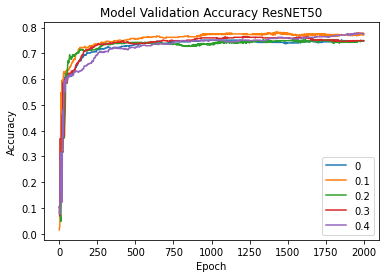

In [ ]:
for history in H3:
 
  # plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Validation Accuracy ResNET50')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(batch, loc='lower right')

plt.show()


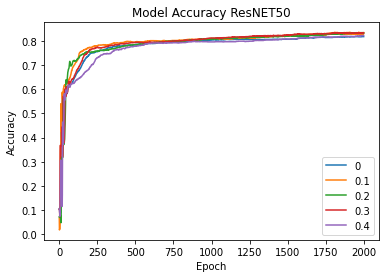

In [ ]:
for history in H3:
 
  # plt.plot(history.history['accuracy'])
  plt.plot(history.history['accuracy'])
  plt.title('Model Accuracy ResNET50')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(batch, loc='lower right')

plt.show()


In [ ]:
import os
import cv2
import imutils as imutils
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf # machine learning
from tqdm import tqdm # make your loops show a smart progress meter 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn
from keras.layers import Dropout
from keras.layers import Input, Dense, Concatenate
from keras.models import Model
# from keras.applications import VGG16
import numpy as np

# we are using resnet50 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import resnet50

# Some random images, labels and target label
trainImages = trainX
trainLabels = trainXmetadata
trainTarget = trainY

valImages = valX
valLabels = valXmetadata
valTarget = valY

# Extract VGG16 features for the images
image_input = Input((128, 128, 3))

model = resnet50.ResNet50(
    include_top=False,
    input_shape=(128, 128, 3),
    weights = 'imagenet',
    pooling='avg'
)

from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf

#Flatten output layer of Resnet
flattened = tf.keras.layers.Flatten()(model.output)

#Fully connected layer 1
fc1 = tf.keras.layers.Dense(128, activation='relu', name="AddedDense1")(flattened)

#Fully connected layer, output layer
fc2 = tf.keras.layers.Dense(64, activation='softmax', name="AddedDense2")(fc1)

fE = tf.keras.models.Model(inputs=model.input, outputs=fc2)

fE.summary()

trainFeatures = fE.predict(trainX)
valFeatures = fE.predict(valX)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

## Model 1

In [ ]:
from keras.layers import Dropout

# Two input layers: one for the image features, one for additional labels
feature_input = Input((64,), name='feature_input')
label_input = Input((43, ), name='label_input')

concatenate_layer = Concatenate(name='concatenation')([feature_input, label_input]) 
dense = Dense(64,activation='relu')(concatenate_layer)
# dense = Dropout(0.3)(dense)
dense = Dense(32,activation='relu')(concatenate_layer)
# dense = Dropout(0.3)(dense)
dense = Dense(16,activation='relu')(concatenate_layer)
flatten=layers.Flatten()(dense) 
output = Dense(6, name='output_layer', activation='softmax')(flatten)

# To define the model, pass list of input layers
model = Model(inputs=[feature_input, label_input], outputs=output)


from sklearn.utils import class_weight

valFeatures = np.reshape(valFeatures, (458, -1))
trainFeatures = np.reshape(trainFeatures, (1378, -1))

optimizer = tf.optimizers.Adam(learning_rate=0.003)

model.compile(optimizer= optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

valconc = [valFeatures, valLabels]

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=50
)

valData=(valconc ,valTarget)

weight = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(trainTarget), y = trainTarget)
weight = {i : weight[i] for i in range(6)}
weight = {0: 1.5730593607305936,
 1: 0.452991452991453,
 2: 0.5243531202435312,
 3: 1.6288416075650118,
 4: 1.9971014492753623,
 5: 50}

# To fit the model, pass a list of inputs arrays
model.fit(x=[trainFeatures, trainLabels], y=trainTarget, epochs=2000,batch_size=5096,verbose=True, validation_data = valData, class_weight = weight)

Epoch 1/2000
1/1 [==============================] - 1s 640ms/step - loss: 15.7824 - accuracy: 0.3179 - val_loss: 6.3605 - val_accuracy: 0.3188
Epoch 2/2000
1/1 [==============================] - 0s 29ms/step - loss: 14.6418 - accuracy: 0.3179 - val_loss: 5.9394 - val_accuracy: 0.3188
Epoch 3/2000
1/1 [==============================] - 0s 24ms/step - loss: 13.5294 - accuracy: 0.3179 - val_loss: 5.5329 - val_accuracy: 0.3188
Epoch 4/2000
1/1 [==============================] - 0s 24ms/step - loss: 12.4520 - accuracy: 0.3179 - val_loss: 5.1460 - val_accuracy: 0.3188
Epoch 5/2000
1/1 [==============================] - 0s 24ms/step - loss: 11.4198 - accuracy: 0.3193 - val_loss: 4.7851 - val_accuracy: 0.3188
Epoch 6/2000
1/1 [==============================] - 0s 24ms/step - loss: 10.4460 - accuracy: 0.3193 - val_loss: 4.4578 - val_accuracy: 0.3188
Epoch 7/2000
1/1 [==============================] - 0s 23ms/step - loss: 9.5451 - accuracy: 0.3186 - val_loss: 4.1694 - val_accuracy: 0.3166
Epoch 

In [ ]:
valPred = model.predict(valconc)
predictions = []

print(valPred)
for i in valPred:
  predictions.append(int(np.argmax(i)))

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn

accuracy = accuracy_score(valY, predictions)
print("Test Accuracy:", accuracy)

[[4.5060652e-01 1.4972213e-03 1.8683659e-02 5.2859670e-01 4.8302513e-04
  1.3283355e-04]
 [9.6117383e-01 1.8370111e-03 6.6772057e-03 2.9916428e-02 3.9300890e-04
  2.5031748e-06]
 [7.3769033e-02 4.4672191e-04 6.0875714e-02 8.5131466e-01 1.8419021e-04
  1.3409597e-02]
 ...
 [4.1264682e-03 1.5551719e-02 7.4566826e-03 1.6393488e-02 2.4277419e-02
  9.3219423e-01]
 [1.2378245e-04 1.8272136e-04 2.9698765e-06 5.3622469e-04 2.6227222e-04
  9.9889201e-01]
 [1.2234504e-04 2.2139296e-02 4.7133659e-04 1.5728567e-02 3.3376411e-02
  9.2816204e-01]]
Test Accuracy: 0.6921397379912664


In [ ]:
testX = np.array(testX)
testY = np.array(testY)

testXfeatures = fE.predict(testX)

testPred = model.predict([testXfeatures,testXmetadata])
predictions = []

print(testPred)
for i in testPred:
  predictions.append(int(np.argmax(i)))

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn

accuracy = accuracy_score(testY, predictions)
print("Test Accuracy:", accuracy)

[[9.79185998e-01 5.85223518e-07 6.99073826e-06 2.03583017e-02
  1.77572048e-07 4.47993021e-04]
 [9.53024328e-01 3.16717637e-06 1.99357637e-05 4.64731231e-02
  7.92063645e-07 4.78595495e-04]
 [9.99352396e-01 7.49028572e-09 4.15538523e-07 6.42807689e-04
  3.51660412e-09 4.46339709e-06]
 ...
 [1.60483771e-03 2.10554674e-04 1.21039666e-04 2.66429153e-04
  3.48025234e-04 9.97449100e-01]
 [2.45858380e-03 2.44041383e-02 6.98078752e-01 2.06455484e-01
  3.21739540e-02 3.64290923e-02]
 [8.20890367e-01 3.66762690e-02 3.09323743e-02 9.58489180e-02
  1.39607117e-02 1.69135956e-03]]
Test Accuracy: 0.6991341991341992


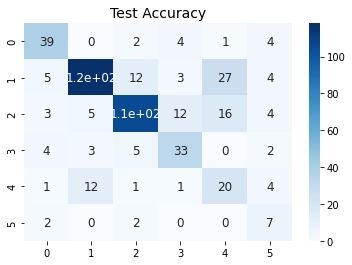

In [ ]:

confusion_mtx = confusion_matrix(testY, predictions)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,annot_kws={"size": 12}, cmap="Blues", ax = ax)
ax.set_title('Test Accuracy', size=14)
plt.show()

### Model 2

In [ ]:
from keras.layers import Dropout

# Two input layers: one for the image features, one for additional labels
feature_input = Input((64,), name='feature_input')
label_input = Input((43, ), name='label_input')

concatenate_layer = Concatenate(name='concatenation')([feature_input, label_input]) 
dense = Dense(64,activation='relu')(concatenate_layer)
dense = Dropout(0.3)(dense)
dense = Dense(32,activation='relu')(concatenate_layer)
dense = Dropout(0.3)(dense)
dense = Dense(16,activation='relu')(concatenate_layer)
flatten=layers.Flatten()(dense) 
output = Dense(6, name='output_layer', activation='softmax')(flatten)

# To define the model, pass list of input layers
model = Model(inputs=[feature_input, label_input], outputs=output)


from sklearn.utils import class_weight

valFeatures = np.reshape(valFeatures, (458, -1))
trainFeatures = np.reshape(trainFeatures, (1378, -1))

optimizer = tf.optimizers.Adam(learning_rate=0.003)

model.compile(optimizer= optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

valconc = [valFeatures, valLabels]

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=50
)

valData=(valconc ,valTarget)

weight = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(trainTarget), y = trainTarget)
weight = {i : weight[i] for i in range(6)}
# weight = {0: 1.5730593607305936,
#  1: 0.452991452991453,
#  2: 0.5243531202435312,
#  3: 1.6288416075650118,
#  4: 1.9971014492753623,
#  5: 14.8}

# To fit the model, pass a list of inputs arrays
model.fit(x=[trainFeatures, trainLabels], y=trainTarget, epochs=2000,batch_size=1378,verbose=True, validation_data = valData, class_weight = weight)

Epoch 1/2000
1/1 [==============================] - 0s 439ms/step - loss: 20.9468 - accuracy: 0.1060 - val_loss: 21.5781 - val_accuracy: 0.1048
Epoch 2/2000
1/1 [==============================] - 0s 23ms/step - loss: 19.8885 - accuracy: 0.1060 - val_loss: 20.4425 - val_accuracy: 0.1048
Epoch 3/2000
1/1 [==============================] - 0s 23ms/step - loss: 18.8370 - accuracy: 0.1060 - val_loss: 19.3140 - val_accuracy: 0.1048
Epoch 4/2000
1/1 [==============================] - 0s 23ms/step - loss: 17.7957 - accuracy: 0.1060 - val_loss: 18.1979 - val_accuracy: 0.1048
Epoch 5/2000
1/1 [==============================] - 0s 24ms/step - loss: 16.7670 - accuracy: 0.1060 - val_loss: 17.0959 - val_accuracy: 0.1048
Epoch 6/2000
1/1 [==============================] - 0s 24ms/step - loss: 15.7519 - accuracy: 0.1060 - val_loss: 16.0100 - val_accuracy: 0.1048
Epoch 7/2000
1/1 [==============================] - 0s 24ms/step - loss: 14.7517 - accuracy: 0.1060 - val_loss: 14.9451 - val_accuracy: 0.104

In [ ]:
# testX = np.array(testX)
# testY = np.array(testY)

# testXfeatures = fE.predict(testX)

testPred = model.predict([testXfeatures,testXmetadata])
predictions = []

print(testPred)
for i in testPred:
  predictions.append(int(np.argmax(i)))

from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn

accuracy = accuracy_score(testY, predictions)
print("Test Accuracy:", accuracy)

[[9.1464597e-01 1.7766095e-06 2.9313614e-04 8.3431751e-02 1.2919201e-05
  1.6144584e-03]
 [8.6823410e-01 5.7580469e-06 3.9481441e-04 1.2916465e-01 2.9597135e-05
  2.1710829e-03]
 [9.9303669e-01 4.5158754e-07 6.1344641e-04 6.2694759e-03 2.1932174e-06
  7.7725213e-05]
 ...
 [1.3742344e-02 3.6007429e-03 1.6714368e-03 1.2549001e-03 9.3237534e-03
  9.7040695e-01]
 [2.2395890e-02 1.9888328e-02 6.0897708e-01 2.8110307e-01 4.4819728e-02
  2.2815883e-02]
 [6.2069517e-01 9.1535002e-02 5.4914653e-02 1.9554742e-01 3.5357460e-02
  1.9502747e-03]]
Test Accuracy: 0.70995670995671


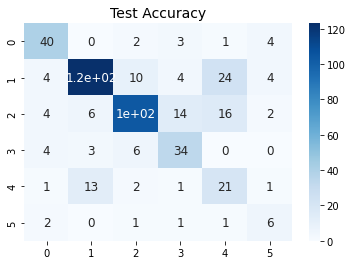

In [ ]:

confusion_mtx = confusion_matrix(testY, predictions)

ax = plt.axes()
sn.heatmap(confusion_mtx, annot=True,annot_kws={"size": 12}, cmap="Blues", ax = ax)
ax.set_title('Test Accuracy', size=14)
plt.show()

## Model 3

In [ ]:
import os
import cv2
import imutils as imutils
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf # machine learning
from tqdm import tqdm # make your loops show a smart progress meter 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn
from keras.layers import Dropout
from keras.layers import Input, Dense, Concatenate
from keras.models import Model
# from keras.applications import VGG16
import numpy as np

# we are using resnet50 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import resnet50

# Some random images, labels and target label
trainImages = trainX
trainLabels = trainXmetadata
trainTarget = trainY

valImages = valX
valLabels = valXmetadata
valTarget = valY

# Extract VGG16 features for the images
image_input = Input((128, 128, 3))

model = resnet50.ResNet50(
    include_top=False,
    input_shape=(128, 128, 3),
    weights = 'imagenet',
    pooling='avg'
)

from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf

#Flatten output layer of Resnet
flattened = tf.keras.layers.Flatten()(model.output)

#Fully connected layer 1
fc1 = tf.keras.layers.Dense(128, activation='relu', name="AddedDense1")(flattened)

#Fully connected layer, output layer
fc2 = tf.keras.layers.Dense(64, activation='softmax', name="AddedDense2")(fc1)
fc2 = tf.keras.layers.Dense(43, activation='softmax', name="AddedDense3")(fc2)

model = tf.keras.models.Model(inputs=model.input, outputs=fc2)

model.summary()

trainFeatures = model.predict(trainX)
valFeatures = model.predict(valX)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']       

In [ ]:
from keras.layers import Dropout

# Two input layers: one for the image features, one for additional labels
feature_input = Input((43,), name='feature_input')
label_input = Input((43, ), name='label_input')

concatenate_layer = Concatenate(name='concatenation')([feature_input, label_input]) 
dense = Dense(64,activation='relu')(concatenate_layer)
dense = Dropout(0.3)(dense)
dense = Dense(32,activation='relu')(concatenate_layer)
dense = Dropout(0.3)(dense)
dense = Dense(16,activation='relu')(concatenate_layer)
flatten=layers.Flatten()(dense) 
output = Dense(6, name='output_layer', activation='softmax')(flatten)

# To define the model, pass list of input layers
model = Model(inputs=[feature_input, label_input], outputs=output)


from sklearn.utils import class_weight

valFeatures = np.reshape(valFeatures, (458, -1))
trainFeatures = np.reshape(trainFeatures, (1378, -1))

optimizer = tf.optimizers.Adam(learning_rate=0.003)

model.compile(optimizer= optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

valconc = [valFeatures, valLabels]

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=50
)

valData=(valconc ,valTarget)

weight = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(trainTarget), y = trainTarget)
weight = {i : weight[i] for i in range(6)}
weight = {0: 1.5730593607305936,
 1: 0.452991452991453,
 2: 0.5243531202435312,
 3: 1.6288416075650118,
 4: 1.9971014492753623,
 5: 14.8}

# To fit the model, pass a list of inputs arrays
model.fit(x=[trainFeatures, trainLabels], y=trainTarget, epochs=2000,batch_size=5096,verbose=True, validation_data = valData, class_weight = weight)

Epoch 1/2000
1/1 [==============================] - 1s 995ms/step - loss: 10.5719 - accuracy: 0.1023 - val_loss: 10.5114 - val_accuracy: 0.1026
Epoch 2/2000
1/1 [==============================] - 0s 95ms/step - loss: 9.7796 - accuracy: 0.1023 - val_loss: 9.8920 - val_accuracy: 0.1026
Epoch 3/2000
1/1 [==============================] - 0s 32ms/step - loss: 9.0149 - accuracy: 0.1023 - val_loss: 9.3094 - val_accuracy: 0.1026
Epoch 4/2000
1/1 [==============================] - 0s 39ms/step - loss: 8.2892 - accuracy: 0.1023 - val_loss: 8.7801 - val_accuracy: 0.1026
Epoch 5/2000
1/1 [==============================] - 0s 52ms/step - loss: 7.6202 - accuracy: 0.1023 - val_loss: 8.3262 - val_accuracy: 0.1026
Epoch 6/2000
1/1 [==============================] - 0s 38ms/step - loss: 7.0337 - accuracy: 0.1030 - val_loss: 7.9671 - val_accuracy: 0.1004
Epoch 7/2000
1/1 [==============================] - 0s 44ms/step - loss: 6.5557 - accuracy: 0.1009 - val_loss: 7.7015 - val_accuracy: 0.0699
Epoch 8/20

### Model 4

In [ ]:
import os
import cv2
import imutils as imutils
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf # machine learning
from tqdm import tqdm # make your loops show a smart progress meter 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn
from keras.layers import Dropout
from keras.layers import Input, Dense, Concatenate
from keras.models import Model
# from keras.applications import VGG16
import numpy as np

# we are using resnet50 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import resnet50

# Some random images, labels and target label
trainImages = trainX
trainLabels = trainXmetadata
trainTarget = trainY

valImages = valX
valLabels = valXmetadata
valTarget = valY

# Extract VGG16 features for the images
image_input = Input((128, 128, 3))

model = resnet50.ResNet50(
    include_top=False,
    input_shape=(128, 128, 3),
    weights = 'imagenet',
    pooling='avg'
)

from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf

#Flatten output layer of Resnet
flattened = tf.keras.layers.Flatten()(model.output)

#Fully connected layer 1
fc1 = tf.keras.layers.Dense(128, activation='relu', name="AddedDense1")(flattened)



model = tf.keras.models.Model(inputs=model.input, outputs=fc1)

model.summary()

trainFeatures = model.predict(trainX)
valFeatures = model.predict(valX)

from keras.layers import Dropout

# Two input layers: one for the image features, one for additional labels
feature_input = Input((128,), name='feature_input')
label_input = Input((43, ), name='label_input')

concatenate_layer = Concatenate(name='concatenation')([feature_input, label_input]) 
dense = Dense(64,activation='relu')(concatenate_layer)
dense = Dropout(0.3)(dense)
dense = Dense(32,activation='relu')(concatenate_layer)
dense = Dropout(0.3)(dense)
dense = Dense(16,activation='relu')(concatenate_layer)
flatten=layers.Flatten()(dense) 
output = Dense(6, name='output_layer', activation='softmax')(flatten)

# To define the model, pass list of input layers
model = Model(inputs=[feature_input, label_input], outputs=output)


from sklearn.utils import class_weight

valFeatures = np.reshape(valFeatures, (458, -1))
trainFeatures = np.reshape(trainFeatures, (1378, -1))

optimizer = tf.optimizers.Adam(learning_rate=0.003)

model.compile(optimizer= optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

valconc = [valFeatures, valLabels]

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=50
)

valData=(valconc ,valTarget)

weight = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(trainTarget), y = trainTarget)
weight = {i : weight[i] for i in range(6)}
weight = {0: 1.5730593607305936,
 1: 0.452991452991453,
 2: 0.5243531202435312,
 3: 1.6288416075650118,
 4: 1.9971014492753623,
 5: 14.8}

# To fit the model, pass a list of inputs arrays
model.fit(x=[trainFeatures, trainLabels], y=trainTarget, epochs=2000,batch_size=5096,verbose=True, validation_data = valData, class_weight = weight)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']       